In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import pandas as pd
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks import simulations as sims

In [5]:
def mgc(X, Y):
    mgc = MGC()
    mgc_statistic, independence_test_metadata = mgc.test_statistic(X, Y)
    p_value, metadata = mgc.p_value(X, Y)

    print("MGC stats from Python:")
    print("MGC test statistic:", mgc_statistic)
    print("P Value:", p_value)
    print("Optimal Scale:", independence_test_metadata["optimal_scale"])
    return mgc_statistic, p_value, independence_test_metadata

In [3]:
def mgc_plot(X, Y):
    plt.clf()
    mgc_statistic, p_value, independence_test_metadata = mgc(X, Y)

    plt.figure(figsize=(8,8))
    ax =sns.scatterplot(x=X[:,0], y=Y[:,0])
    ax.set_xlabel('X', fontsize=15)
    ax.set_ylabel('Y', fontsize=15) 
    plt.axis('equal')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    
    local_corr = independence_test_metadata["local_correlation_matrix"]

    # Define two rows for subplots
    fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})
    # Draw heatmap
    ax = sns.heatmap(local_corr, cmap="YlGnBu", ax=ax, cbar=False)
    # colorbar
    fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
    ax.invert_yaxis()
    optimal_scale = independence_test_metadata["optimal_scale"]
    ax.scatter(optimal_scale[0], optimal_scale[1], marker='X', s=200, color='red') 

    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_xlabel('#Neighbors for X', fontsize=15)
    ax.set_ylabel('#Neighbors for Y', fontsize=15) 
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    cax.xaxis.set_tick_params(labelsize=15)
    cax.yaxis.set_tick_params(labelsize=15)

    fig.suptitle('cMGC = ' + str(mgc_statistic) + ', pMGC = ' + str(p_value), fontsize=20)

    plt.show()

MGC stats from Python:
MGC test statistic: 0.9450505
P Value: 0.0
Optimal Scale: [60, 60]


<Figure size 432x288 with 0 Axes>

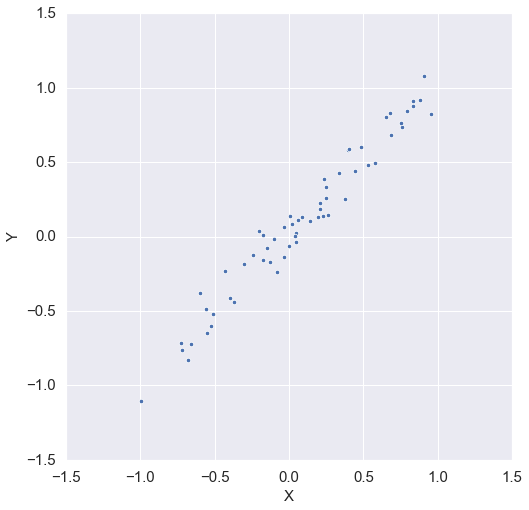

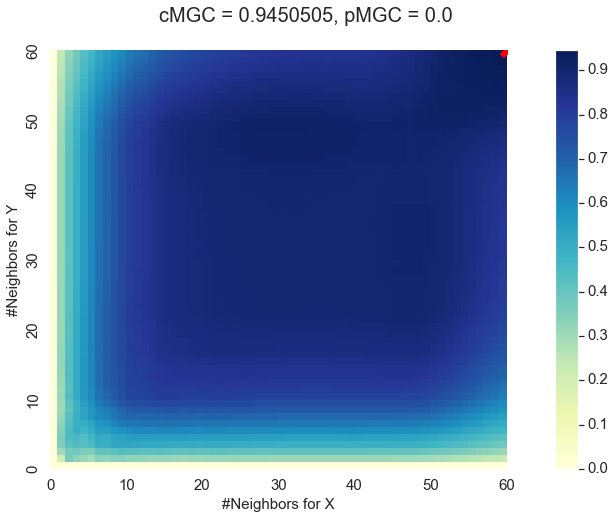

In [4]:
# Linear data
X, Y = sims.linear_sim(num_samp=60, num_dim=1, noise=0.1)
mgc_plot(X, Y)

MGC stats from Python:
MGC test statistic: 0.1597841
P Value: 0.003
Optimal Scale: [5, 6]


<Figure size 432x288 with 0 Axes>

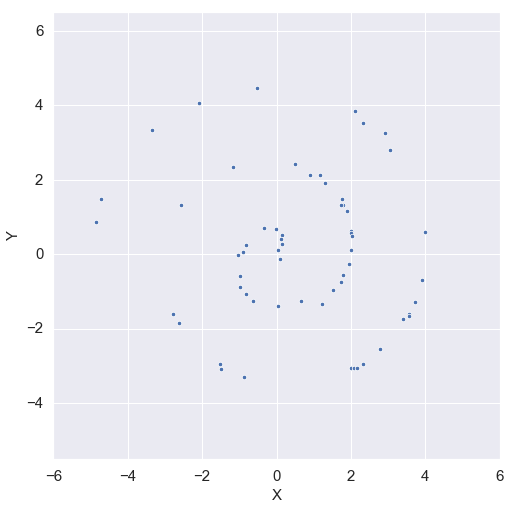

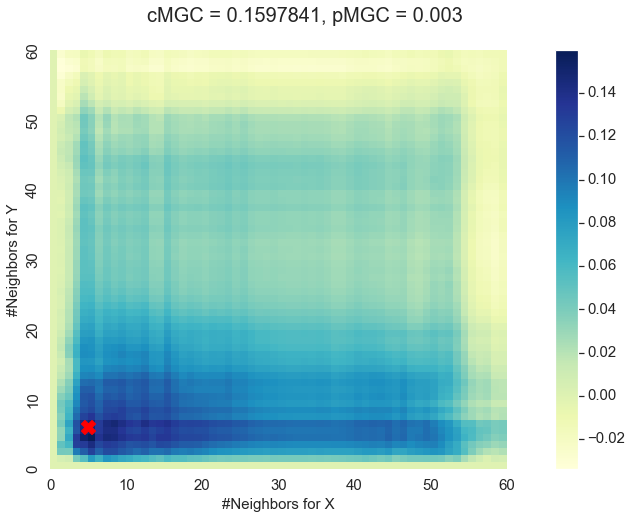

In [5]:
# Spiral data
X, Y = sims.spiral_sim(num_samp=60, num_dim=1, noise=0.1)
mgc_plot(X, Y)

MGC stats from Python:
MGC test statistic: 0.6502668
P Value: 0.0
Optimal Scale: [12, 29]


<Figure size 432x288 with 0 Axes>

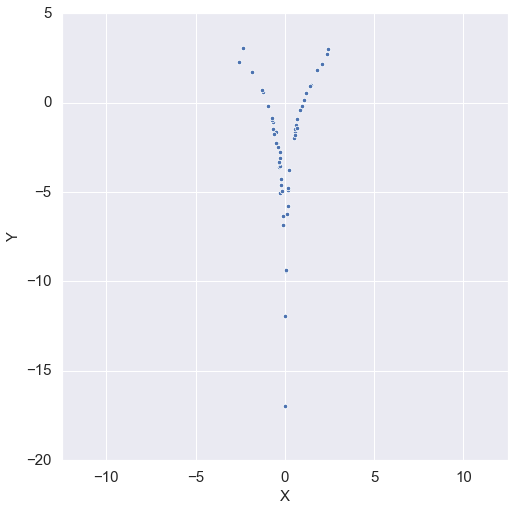

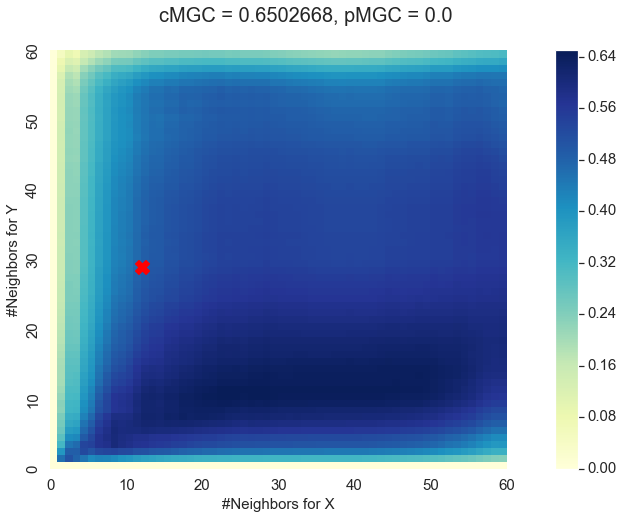

In [6]:
# Logarithmic data
X, Y = sims.log_sim(num_samp=60, num_dim=1, noise=0.1)
mgc_plot(X, Y)


MGC stats from Python:
MGC test statistic: 0.8072072
P Value: 0.0
Optimal Scale: [53, 46]


<Figure size 432x288 with 0 Axes>

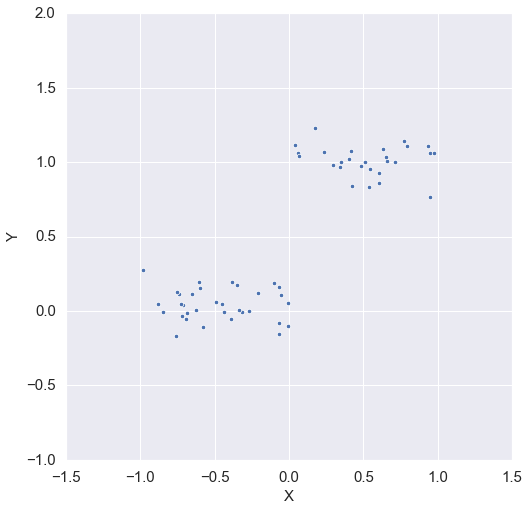

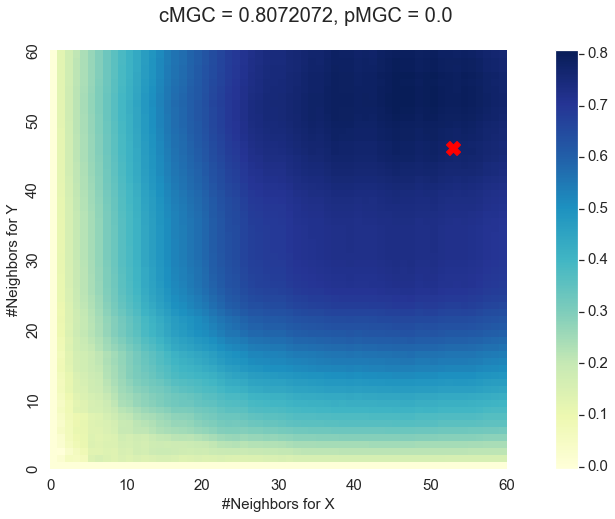

In [7]:
# Step data
X, Y = sims.step_sim(num_samp=60, num_dim=1, noise=0.1)
mgc_plot(X, Y)

MGC stats from Python:
MGC test statistic: 0.3873655
P Value: 0.0
Optimal Scale: [17, 51]


<Figure size 432x288 with 0 Axes>

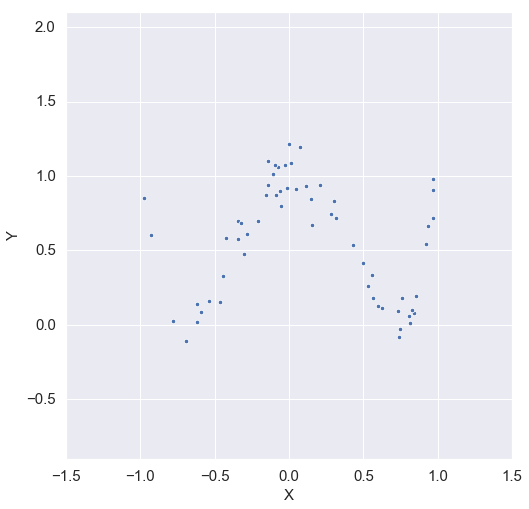

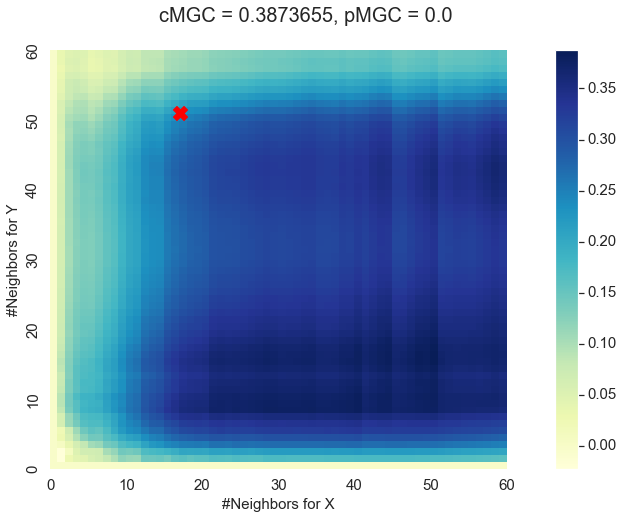

In [8]:
# W data
X, Y = sims.w_sim(num_samp=60, num_dim=1, noise=0.1)
mgc_plot(X, Y)